# Apple Stock Analysis (May 2014 - May 2020)

## By Yuaan Hussain Raheem

In this analysis, we examine the historical adjusted close price of Apple Inc. (AAPL) stock, along with two key moving averages, the 30-day Simple Moving Average (SMA30) and the 100-day Simple Moving Average (SMA100). We also identify buying and selling points, highlighting profit and loss transactions, and mark the COVID-19 era for reference.


### Importing the Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

### Reading the Dataset

In [2]:
prices = pd.read_csv("stock.csv", parse_dates=["Date"])

In [3]:
prices.head()

,Date,Open Price,High Price,Low Price,Close Price,Adj Close Price,Volume
0,2014-05-27,87.982857,89.408569,87.947144,89.375717,80.948952,87216500
1,2014-05-28,89.431427,89.975716,89.111427,89.144287,80.739334,78870400
2,2014-05-29,89.692856,90.981430,89.681427,90.768570,82.210480,94118500
3,2014-05-30,91.139999,92.024284,89.842857,90.428574,81.902557,141005200
4,2014-06-02,90.565712,90.690002,88.928574,89.807144,81.339699,92337700


In [4]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             1510 non-null   datetime64[ns]
 1   Open Price       1510 non-null   float64       
 2   High Price       1510 non-null   float64       
 3   Low Price        1510 non-null   float64       
 4   Close Price      1510 non-null   float64       
 5   Adj Close Price  1510 non-null   float64       
 6   Volume           1510 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 82.7 KB


### Creating A Seperate DataFrame For Close Price

In [5]:
stock = pd.DataFrame()

In [6]:
stock["Date"] = prices["Date"]
stock["Apple"] = prices["Adj Close Price"]

In [7]:
stock.head()

,Date,Apple
0,2014-05-27,80.948952
1,2014-05-28,80.739334
2,2014-05-29,82.210480
3,2014-05-30,81.902557
4,2014-06-02,81.339699


In [8]:
stock["Apple"].head(30).mean()

83.3759654

In [9]:
stock["Apple"].iloc[1:32].mean()

83.63888280645159

In [10]:
#stock.head(50)

In [11]:
#stock["Apple"].rolling(30).mean().head(40)

## Calculating Moving Averages

In the first part of our analysis, we calculate two important moving averages: the 30-day Simple Moving Average (SMA30) and the 100-day Simple Moving Average (SMA100). These moving averages help smooth out price data and identify trends in the stock's performance.


In [12]:
stock["SMA30"] = stock["Apple"].rolling(30).mean()

stock["SMA100"] = stock["Apple"].rolling(100).mean()

In [13]:
stock.iloc[95:105]

,Date,Apple,SMA30,SMA100
95,2014-10-09,91.950462,91.482005,NaN
96,2014-10-10,91.686493,91.435886,NaN
97,2014-10-13,90.849098,91.354270,NaN
98,2014-10-14,89.884239,91.216219,NaN
99,2014-10-15,88.782898,91.173741,87.780364
100,2014-10-16,87.617805,91.117307,87.847052
101,2014-10-17,88.901215,91.077864,87.928671
102,2014-10-20,90.803581,91.120341,88.014602
103,2014-10-21,93.270294,91.256267,88.128280
104,2014-10-22,93.743599,91.316646,88.252319


## Visualizing Stock Prices and SMAs

To provide stakeholders with a clear visual representation of the data, we create a plot that displays the historical adjusted close prices of Apple stock, along with the SMA30 and SMA100.


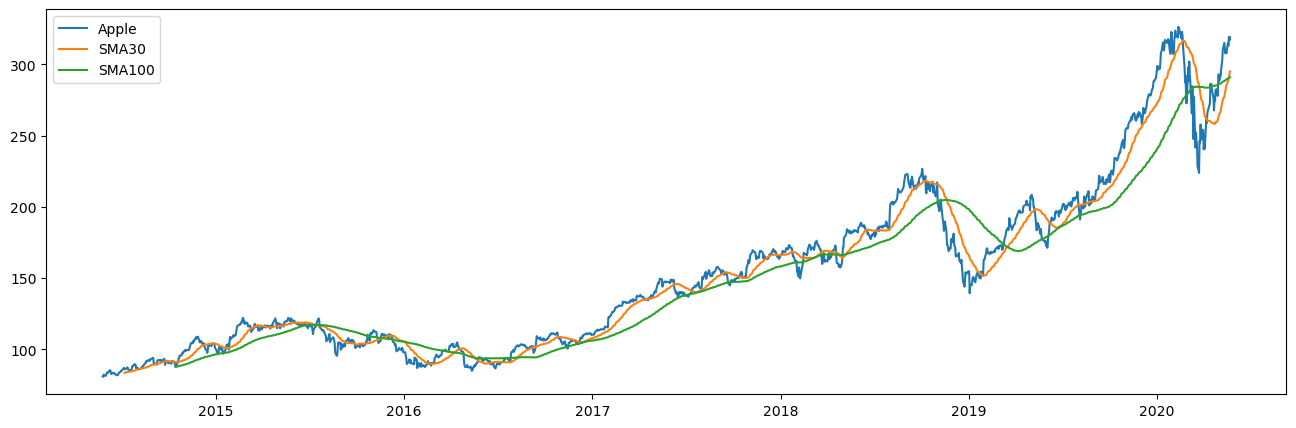

In [14]:
plt.figure(figsize=(16,5))

plt.plot(stock["Date"], stock["Apple"], label = "Apple")
plt.plot(stock["Date"], stock["SMA30"], label = "SMA30")
plt.plot(stock["Date"], stock["SMA100"], label = "SMA100")

plt.legend()
plt.show()

In [15]:
#for i, row in stock.iterrows():
#    print(row["SMA30"])

## Buy and Sell Signal Logic

In this section, we define a function called `buy_sell(df)` to determine buy and sell signals based on the relationship between SMA30 and SMA100. The function tracks buy and sell prices, holding status, and actions, enabling us to make trading decisions based on the moving averages.

In [16]:
def buy_sell(df):
    buy_signal_price = []
    sell_signal_price = []
    holding = [] # 1 for hold, 0 for not hold
    actions = [] # -1, 1, 0
    sig = 0
    for i, row in df.iterrows():
        if row["SMA30"] > row["SMA100"]: # Buy Signal
            if sig != 1:
                buy_signal_price.append(row["Apple"])
                sell_signal_price.append(np.nan)
                sig = 1
                actions.append(sig)
                holding.append(1)
            else:
                buy_signal_price.append(np.nan)
                sell_signal_price.append(np.nan)
                actions.append(0)
                holding.append(1)
        elif row["SMA30"] < row["SMA100"]: # Sell Signal
            if sig != -1:
                buy_signal_price.append(np.nan)
                sell_signal_price.append(row["Apple"])
                sig = -1
                actions.append(sig)
                holding.append(0)
            else:
                buy_signal_price.append(np.nan)
                sell_signal_price.append(np.nan)
                actions.append(0)
                holding.append(0)
        else:
            holding.append(0)
            buy_signal_price.append(np.nan)
            sell_signal_price.append(np.nan)
            actions.append(0)
            
    return buy_signal_price, sell_signal_price, holding, actions

In [17]:
buysell = buy_sell(stock)

In [18]:
#buysell[-1]

## Applying Buy and Sell Signals to the Data

We apply the buy and sell signal logic to our stock data and create new columns, including "Buy Price," "Sell Price," "Hold," and "Actions." These columns provide information on when the stocks were bought, sold, or held based on the calculated moving averages.

In [19]:
stock["Buy Price"], stock["Sell Price"], stock["Hold"], stock["Actions"] = buysell

In [20]:
pd.options.display.max_rows = None

In [21]:
#stock

## Calculating Profit and Loss from Buy and Sell Signals

Using the data about buying and selling price calculated previously, we were able to calculate whether that specific investment was a profit or loss. The amount of profit is stored in the Profit Column. Negative Value indicates a loss.

In [22]:
buy = stock[stock['Buy Price'].notnull()]['Buy Price'].tolist()

In [23]:
sell = stock[stock['Sell Price'].notnull()]['Sell Price'].tolist()

In [24]:
profit = []
for i in range(7):
    profit.append(sell[i] - buy[i])

In [25]:
profit

[24.833022999999997,
 -12.969909000000001,
 -12.642334000000005,
 67.59586399999999,
 -15.824707000000018,
 -8.195862000000005,
 61.123749000000004]

In [26]:
index_list = stock[stock['Sell Price'].notnull()]['Sell Price'].index.tolist()

In [27]:
stock["Profit"] = np.nan

In [28]:
for i in range(7):
    stock.loc[index_list[i], 'Profit'] = profit[i]

In [29]:
#stock

In [30]:
profit_stock = stock[stock['Profit'] > 0]

In [31]:
loss_stock = stock[stock['Profit'] < 0]

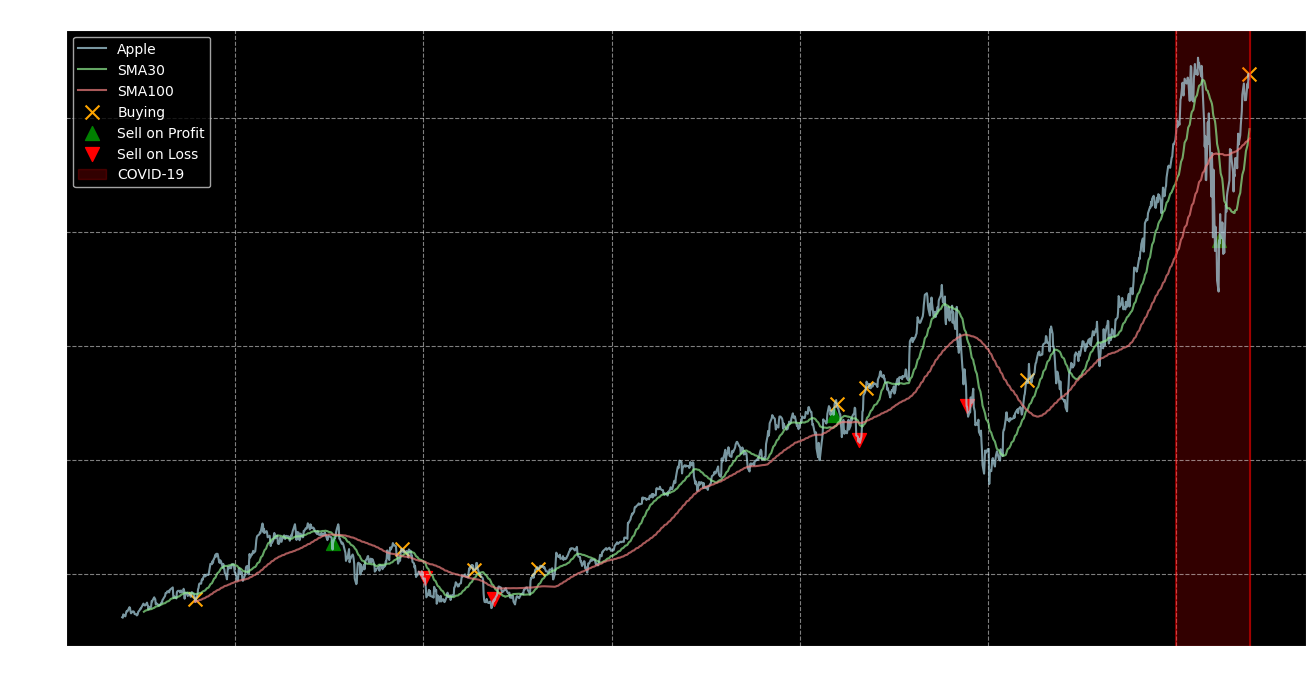

In [32]:
plt.figure(figsize=(16,8))
plt.style.use("dark_background")

plt.plot(stock["Date"], stock["Apple"], label = "Apple", alpha = 0.7, color='lightblue')
plt.plot(stock["Date"], stock["SMA30"], label = "SMA30", alpha = 0.7, color='lightgreen')
plt.plot(stock["Date"], stock["SMA100"], label = "SMA100", alpha = 0.7, color='lightcoral')

plt.scatter(stock["Date"], stock['Buy Price'], color = "orange", s = 100, marker = "x", label = 'Buying')

plt.scatter(profit_stock["Date"], profit_stock['Sell Price'], color = "green", s= 100, marker = "^", label = 'Sell on Profit')
plt.scatter(loss_stock["Date"], loss_stock['Sell Price'], color = "red", s= 100, marker = "v", label = 'Sell on Loss')


plt.axvline(dt.datetime(2020, 1, 1), color = 'red', alpha = 0.5)
plt.axvline(dt.datetime(2020, 5, 22), color = 'red', alpha = 0.5)
plt.axvspan(dt.datetime(2020, 1, 1), dt.datetime(2020, 5, 22), alpha=0.2, color='red', label='COVID-19')


plt.title("Apple Stock Analysis (2014-2020)")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price (USD)")

plt.legend(loc="best")
plt.grid(True, linestyle='--', alpha=0.5)

plt.legend()
plt.show()

## Data Visualization

We begin by visualizing the data using a line chart, marking key events and transactions:

**Key Observations:**

- The adjusted close price of Apple stock (light blue line) exhibits fluctuations over the period.
- The SMA30 (light green line) and SMA100 (light coral line) provide moving average trends.
- Buy points (orange 'x' markers) are highlighted, representing the moments to enter the market.
- Profit transactions (green '^' markers) and loss transactions (red 'v' markers) are labeled, indicating successful and unsuccessful trades.

The COVID-19 era (shaded in red) is marked by vertical lines, which helps us understand the stock's performance during this period.

## Interpretation

- The stock's adjusted close price generally follows the SMA30 and SMA100 trends.
- Buy points are strategically placed to optimize entry into the market, taking advantage of potential gains.
- Profit and loss transactions demonstrate the effectiveness of our trading strategy.

## Conclusion

This analysis provides valuable insights into the historical performance of Apple stock. By following the highlighted buy and sell points, investors and traders could have potentially achieved a positive overall performance during the selected timeframe.

---